##red_wine 만을 가지고 다중 분류(등급)

In [8]:
#import 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import seaborn  as sns 

In [9]:
red = pd.read_csv('/content/drive/MyDrive/인공지능사관학교/딥러닝/winequality-red.csv')


In [10]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
red.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [12]:
red.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

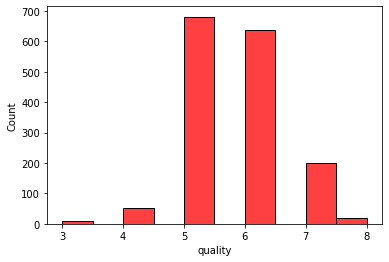

In [19]:
sns.histplot(data = red['quality'],color = 'red',binwidth=0.5)
'''
3 4 5  == 0
6 7 8  == 1
'''

In [23]:
red.loc[red['quality'] <= 5,'new_quality'] = 0
red.loc[red['quality'] >= 6 ,'new_quality'] = 1

In [24]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.0


In [26]:
del red['quality']


In [27]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0.0


In [28]:
#min_max norm 
red_norm = red - red.min() / red.max() - red.min()


In [29]:
red_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,2.510692,0.504051,0.00,0.941935,0.04436,9.986111,27.979239,-0.97870,0.086708,0.065,0.436242,0.0
1,2.910692,0.684051,0.00,1.641935,0.06636,23.986111,60.979239,-0.97970,-0.223292,0.185,0.836242,0.0
2,2.910692,0.564051,0.04,1.341935,0.06036,13.986111,47.979239,-0.97950,-0.163292,0.155,0.836242,0.0
3,6.310692,0.084051,0.56,0.941935,0.04336,15.986111,53.979239,-0.97850,-0.263292,0.085,0.836242,1.0
4,2.510692,0.504051,0.00,0.941935,0.04436,9.986111,27.979239,-0.97870,0.086708,0.065,0.436242,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.310692,0.404051,0.08,1.041935,0.05836,30.986111,37.979239,-0.98160,0.026708,0.085,1.536242,0.0
1595,1.010692,0.354051,0.10,1.241935,0.03036,37.986111,44.979239,-0.98138,0.096708,0.265,2.236242,1.0
1596,1.410692,0.314051,0.13,1.341935,0.04436,27.986111,33.979239,-0.98076,-0.003292,0.255,2.036242,1.0
1597,1.010692,0.449051,0.12,1.041935,0.04336,30.986111,37.979239,-0.98103,0.146708,0.215,1.236242,0.0


In [30]:
#shuffle
red_shuffle = red_norm.sample(frac = 1)

In [31]:
#numpy 
red_np = red_shuffle.to_numpy()

In [32]:
#train_test_index 
train_ratio = 0.8
train_test_index = int(red_np.shape[0] * train_ratio)

In [35]:
#train_test_split
train_x,train_y = red_np[:train_test_index , :-1],red_np[:train_test_index,-1:]
test_x,test_y = red_np[train_test_index:,:-1],red_np[train_test_index:,-1:]

train_x.shape

(1279, 11)

In [34]:
#train_y test_y categorical 
train_y_to_categorical = tf.keras.utils.to_categorical(train_y,num_classes =2)
test_y_to_categorical = tf.keras.utils.to_categorical(test_y,num_classes = 2)

In [65]:
#model 
model = tf.keras.Sequential([
        tf.keras.layers.Dense(units = 48,activation = 'swish',input_shape = (11,)),
        tf.keras.layers.Dense(units = 24,activation = 'swish'),
        tf.keras.layers.Dense(units = 12,activation = 'swish'),
        tf.keras.layers.Dense(units = 2,activation = 'sigmoid'),
])

In [68]:
#model compile 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [69]:
history = model.fit(train_x,train_y_to_categorical,epochs = 200 , batch_size= 32 , validation_split=0.2 , callbacks= tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience= 10))

Epoch 1/200
32/32 [==============================] - 1s 7ms/step - loss: 0.6177 - accuracy: 0.6510 - val_loss: 0.6385 - val_accuracy: 0.5898
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.6608 - val_loss: 0.6348 - val_accuracy: 0.6016
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5775 - accuracy: 0.6950 - val_loss: 0.6334 - val_accuracy: 0.6016
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.6862 - val_loss: 0.5998 - val_accuracy: 0.6758
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.6979 - val_loss: 0.5815 - val_accuracy: 0.6992
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5526 - accuracy: 0.7351 - val_loss: 0.5842 - val_accuracy: 0.6641
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7273 - val_loss: 0.5655 - val_accuracy: 0.7227
Epoch 8/200
3

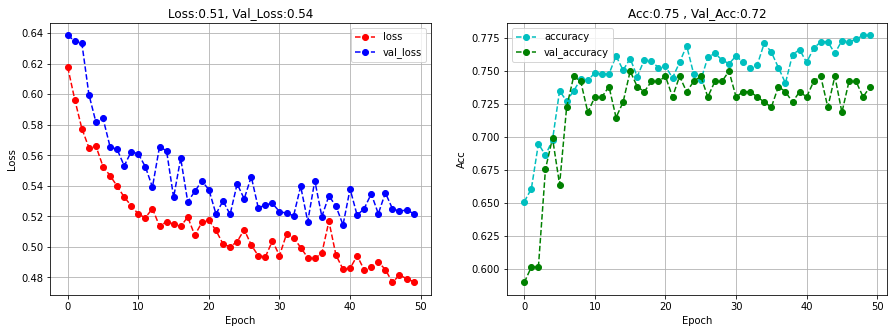

In [76]:
Loss_mean = np.mean(history.history['loss'])
Val_Loss_mean = np.mean(history.history['val_loss'])
Acc_mean = np.mean(history.history['accuracy'])
Val_Acc_mean = np.mean(history.history['val_accuracy'])
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'r--o',label = 'loss')
plt.plot(history.history['val_loss'],'b--o',label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.plot()
plt.title('Loss:{}, Val_Loss:{}'.format(np.round(Loss_mean,2),np.round(Val_Loss_mean,2)))
plt.subplot(1,2,2)

plt.plot(history.history['accuracy'],'c--o',label = 'accuracy')
plt.plot(history.history['val_accuracy'],'g--o',label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.grid()
plt.legend()
plt.plot()


plt.title('Acc:{} , Val_Acc:{}'.format(np.round(Acc_mean,2),np.round(Val_Acc_mean,2)))
plt.show()


In [77]:
pred_y = model.predict(test_x)

In [81]:
pred_y_round = np.round(pred_y,0)
pred_y_round

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [84]:
pred_y_argmax = np.argmax(pred_y_round ,axis = 1).reshape(-1,1)

In [85]:
pred_y_argmax

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [89]:
test_y_argmax = np.argmax(test_y_to_categorical,axis =1).reshape(-1,1)

In [90]:
test_y_argmax

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [91]:
np.mean(np.equal(pred_y_argmax,test_y_argmax))

0.75